# Assignment Python 3
___
Rheina Febrianti Khairunissa <br>
PYTN-KS17-014

In [1]:
import numpy as np
import pandas as pd
import random
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=';',engine='python')
print('Data berhasil diinput!')

Data berhasil diinput!


In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


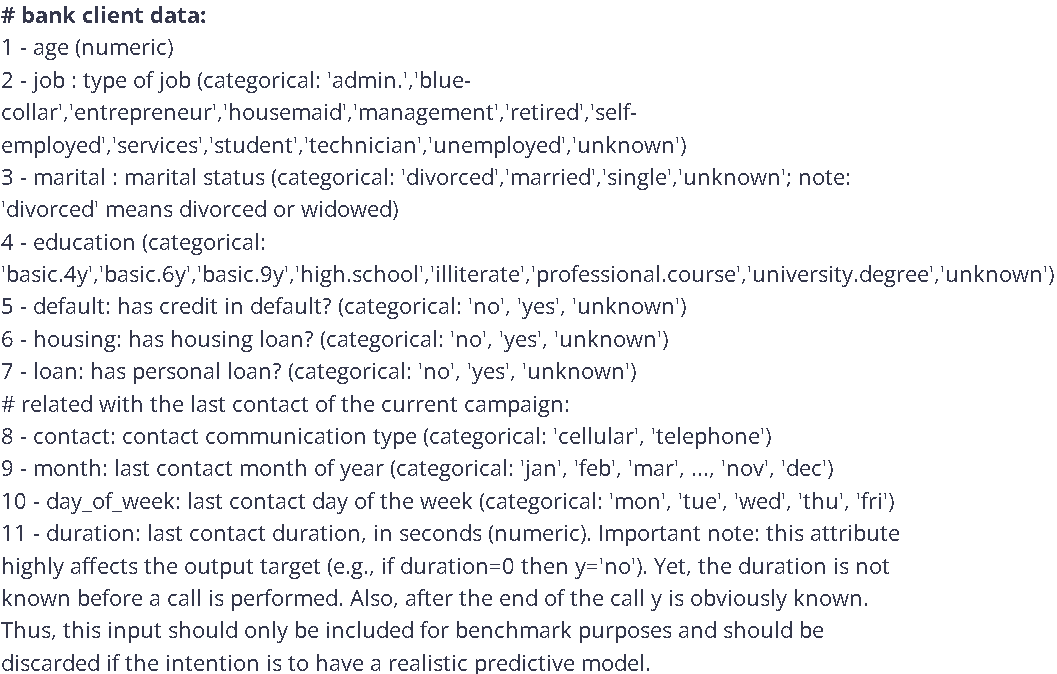

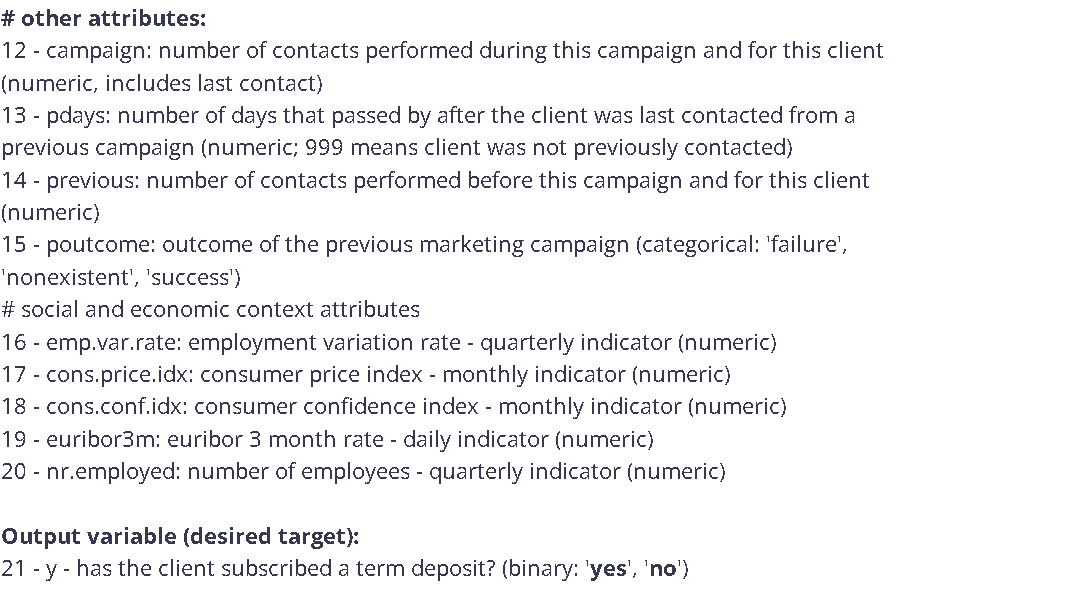

In [4]:
df.shape

(41188, 21)

In [5]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# Visualization

## Bar Plot untuk Visualisasi dari setiap Category.

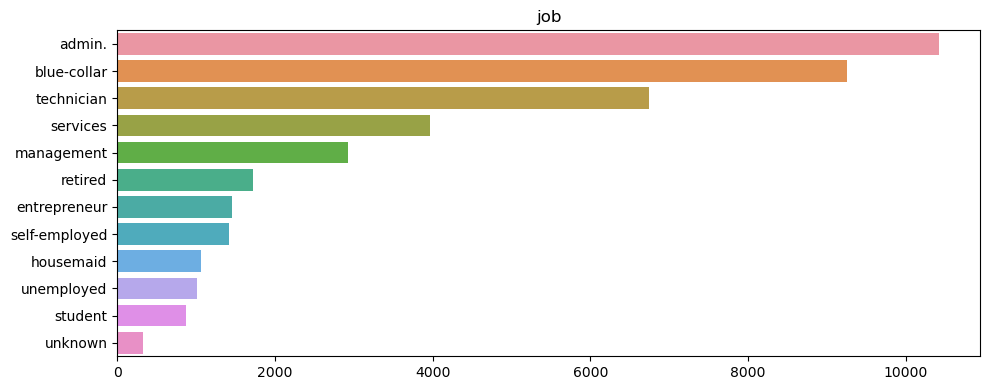

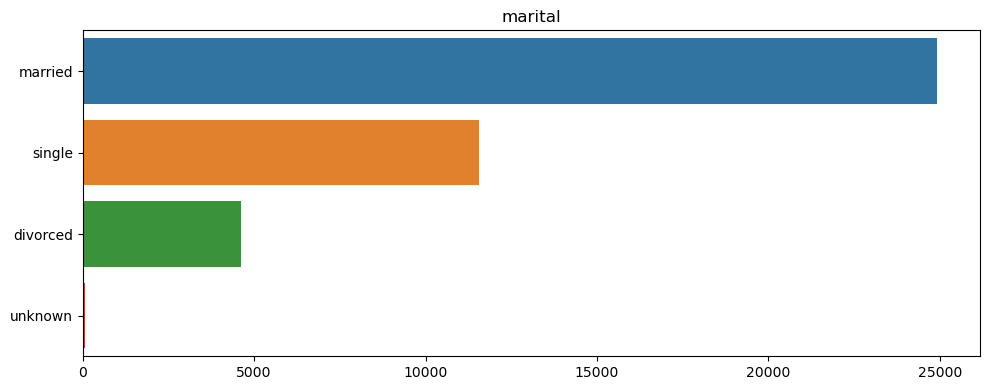

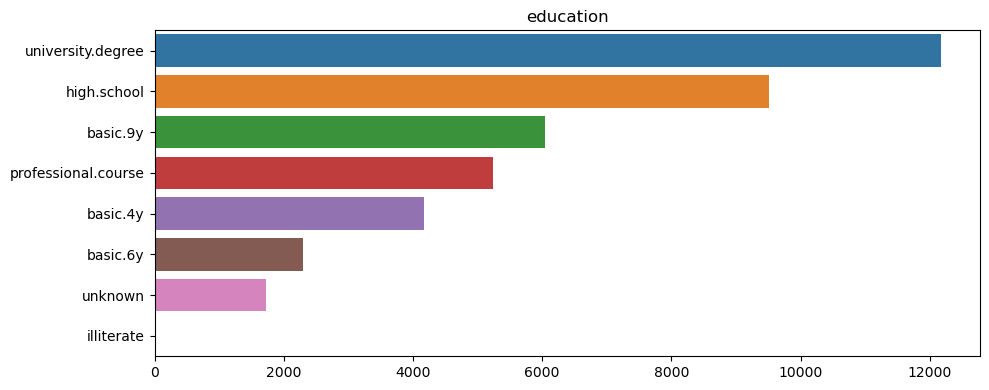

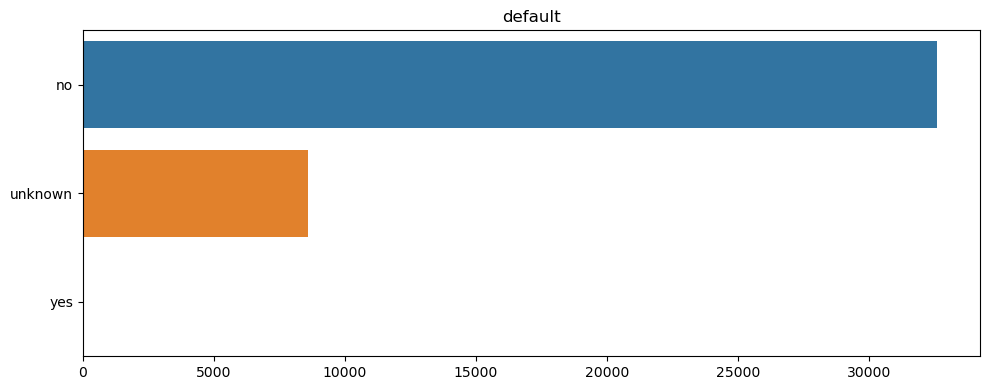

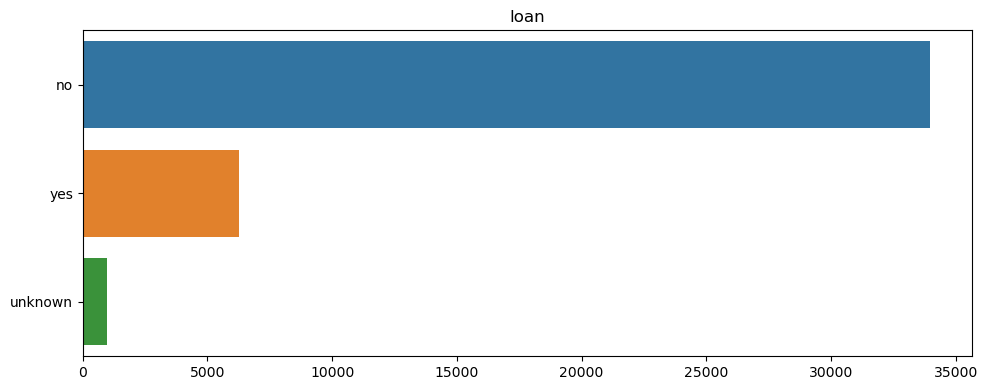

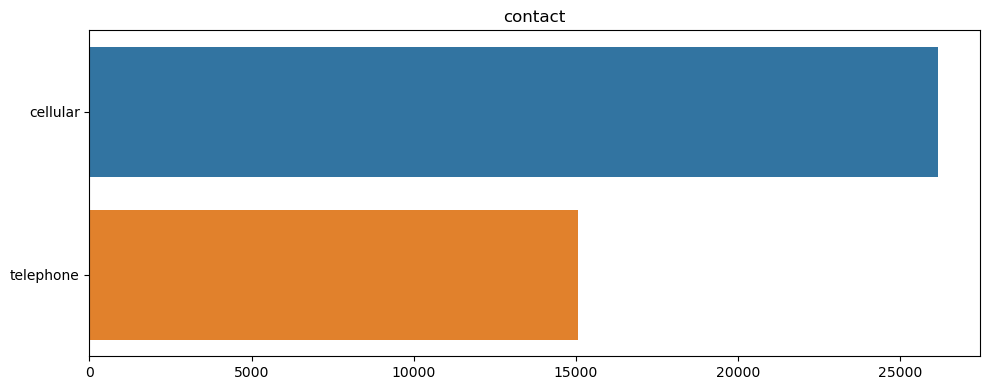

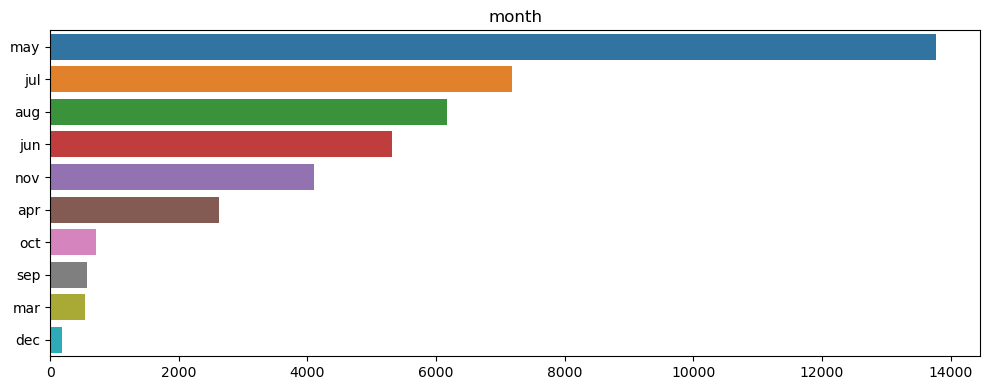

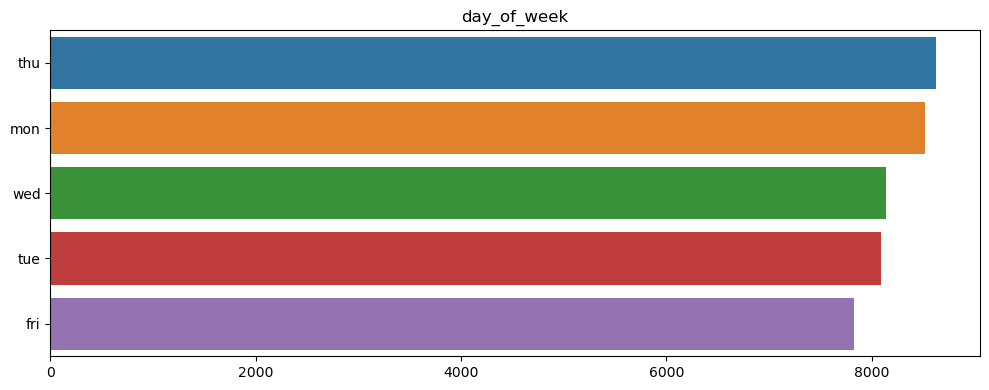

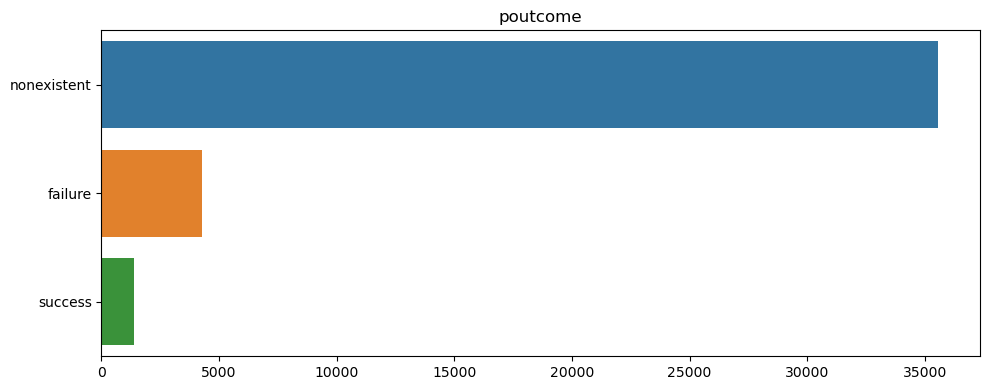

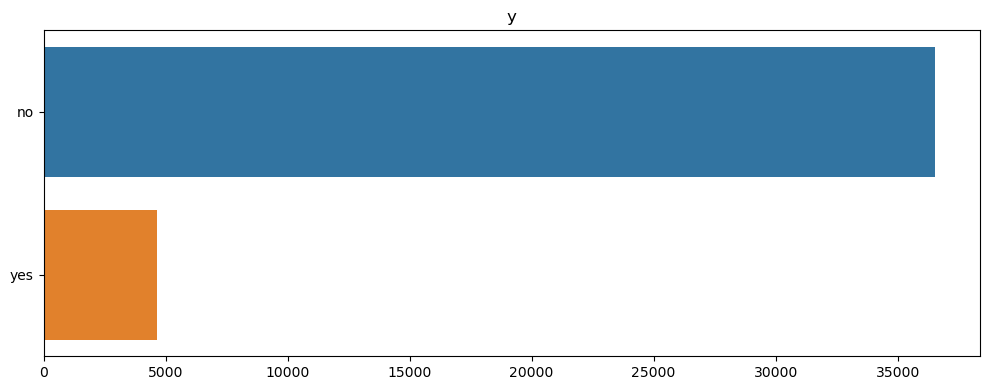

In [6]:
categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for col in categorical_variables:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=df[col].value_counts().values, y=df[col].value_counts().index, orient='h')
    plt.title(col)
    plt.tight_layout()


## Barplot untuk setiap category baik dalam frekuensi relatif maupun frekuensi relatif yang dinormalisasi.

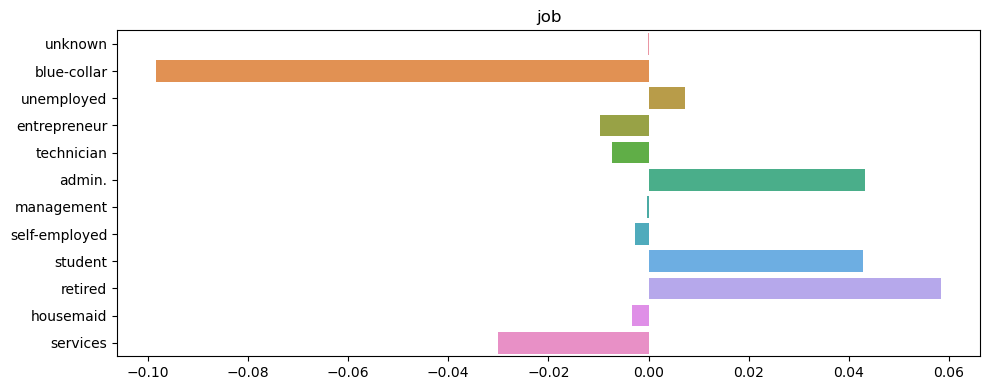

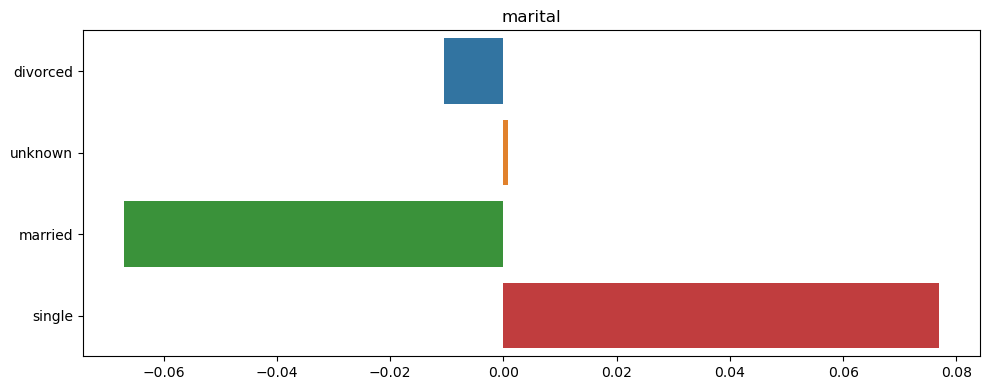

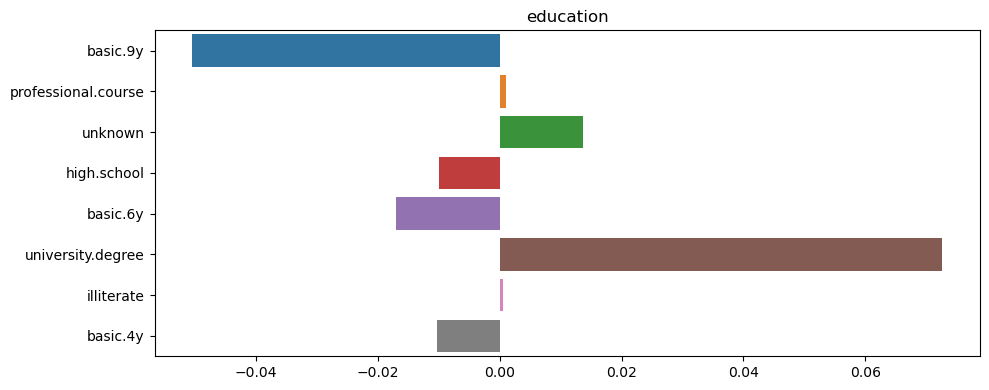

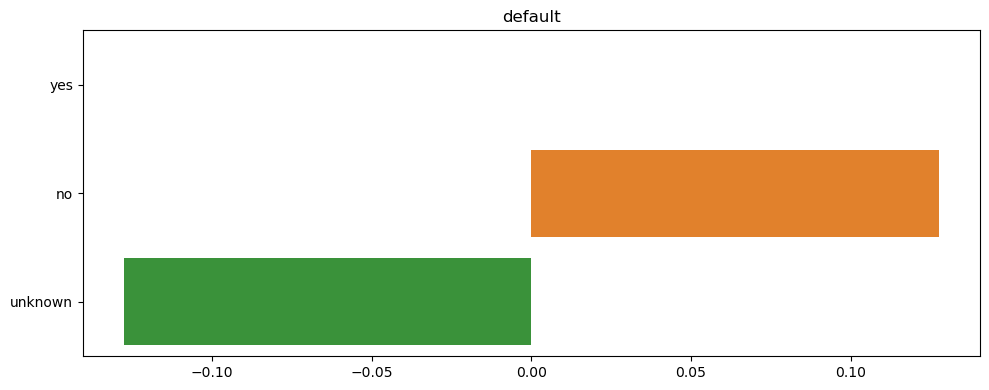

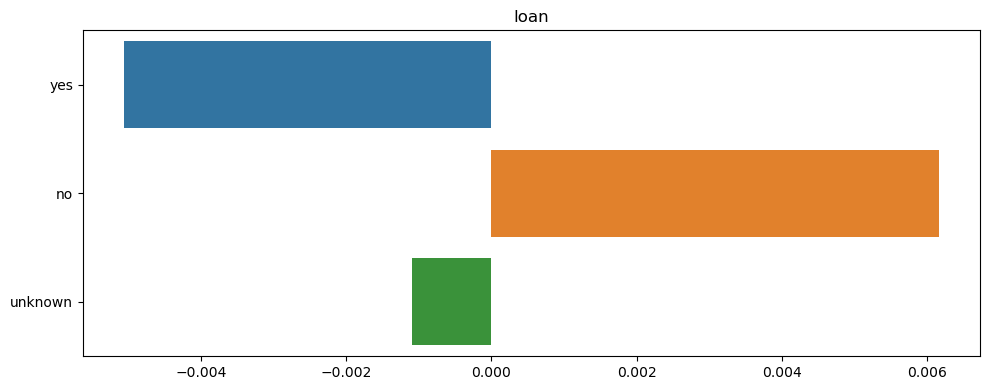

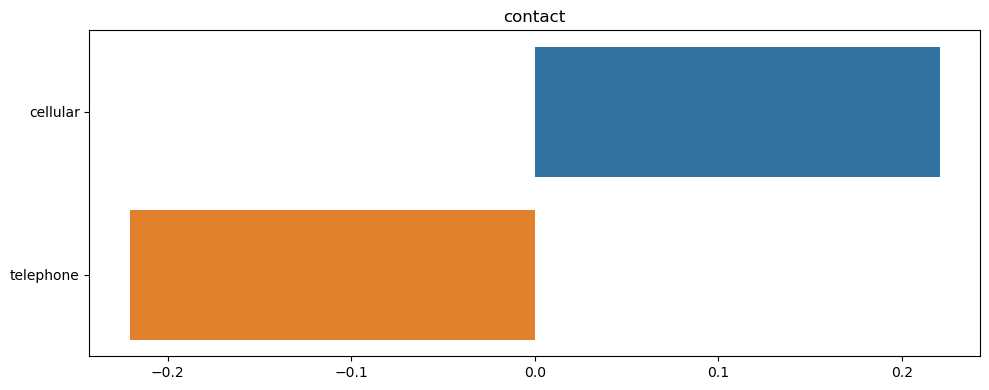

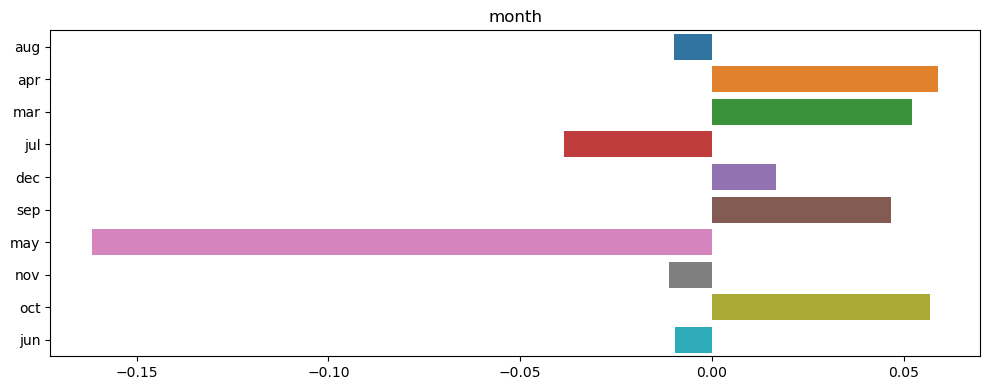

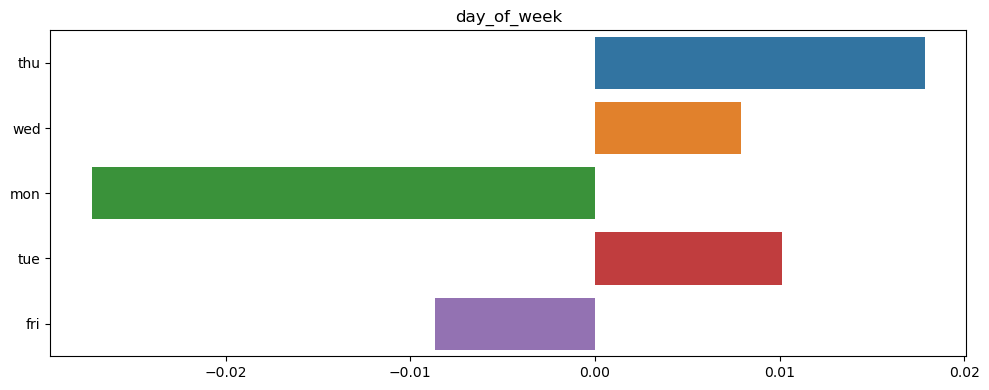

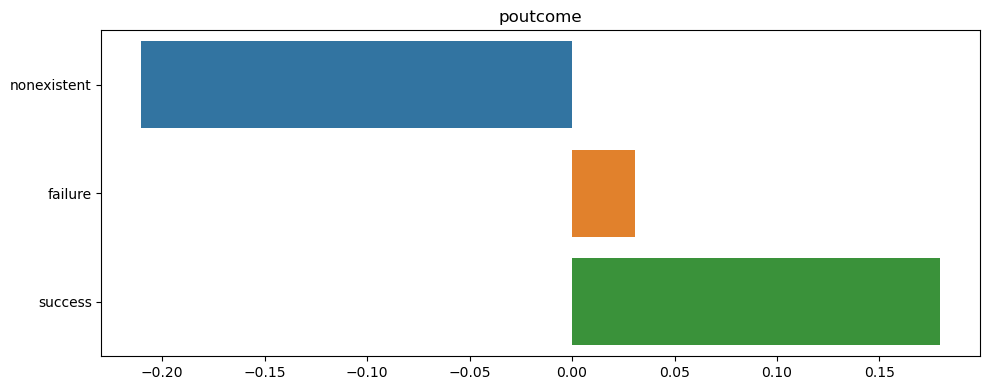

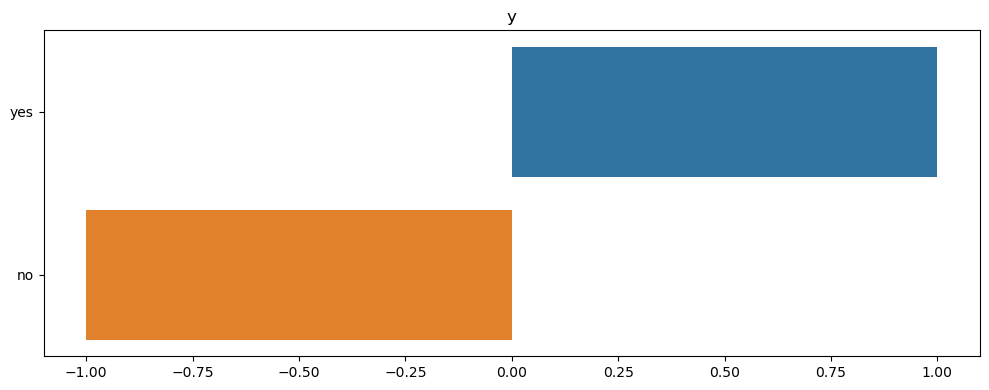

In [7]:
for col in categorical_variables:
    plt.figure(figsize=(10, 4))
    # Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts()
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()

    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))

    # Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()

    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()

    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(x=all_counts, y=all_index, orient='h')
    plt.title(col)
    plt.tight_layout()


## Membuat Pie Chart untuk kolom 'y' dalam visualisasi persentase klien yang telah subscribe deposito berjangka.

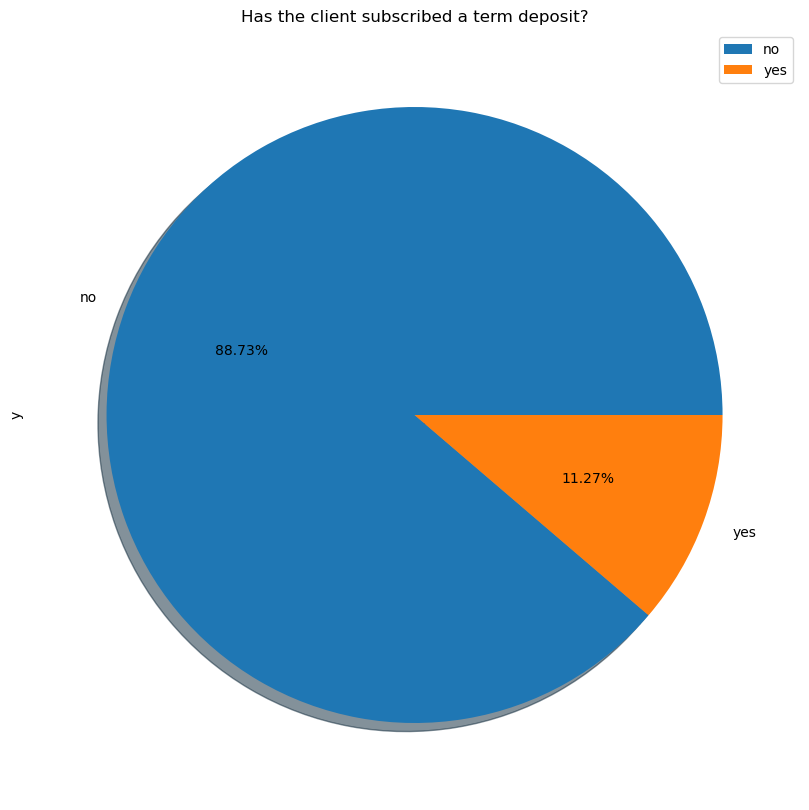

In [8]:
plt.figure(figsize=(10,10))
df['y'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.title("Has the client subscribed a term deposit?")
plt.legend()
plt.show()

## Membuat Cross Tab untuk melihat hubungan antara dua variabel dalam satu tabel.

In [9]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [10]:
# Membuat cross tab untuk variabel job dan education
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0


## Mengisi data 'unknown' dengan data yang lebih relevan.

In [11]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'


In [12]:
# Periksa data 'unknown' yang telah diisi dengan cross tab
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
job,,,,,,,,
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0


In [13]:
# Membuat cross tab untuk variabel job dan housing
cross_tab(df,'job','housing')

,no,yes,unknown
job,,,
admin.,4636,5559,227
blue-collar,4362,4752,241
entrepreneur,641,779,36
housemaid,491,540,29
management,1363,1490,71
retired,789,908,44
self-employed,641,740,40
services,1818,2050,101
student,381,471,23


## Menghapus data unknown

In [14]:
df = df[df.housing != 'unknown']
df = df[df.loan != 'unknown']
df = df[df.default != 'unknown']
df = df[df.job != 'unknown']
df = df[df.marital != 'unknown']
df = df[df.education != 'unknown']

In [15]:
# Check Missing Values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
# Check Duplicated Values
df.duplicated().sum()

10

In [17]:
# Drop Duplicates Values
df.drop_duplicates(inplace=True)

In [18]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000
mean,39.077283,2.520742,956.096287,0.194783,-0.071341,93.524002,-40.592642,3.460800,5160.798343
std,10.352361,2.719635,201.903690,0.524436,1.610917,0.585672,4.789308,1.777185,75.159098
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,46.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Histogram berdasarkan pdays/jumlah hari yang telah berlalu setelah klien terakhir kali dihubungi dari kampanye sebelumnya. (tanpa 999 berarti klien tidak dihubungi sebelumnya)

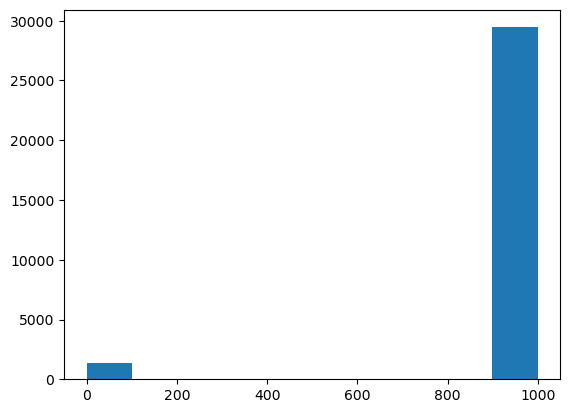

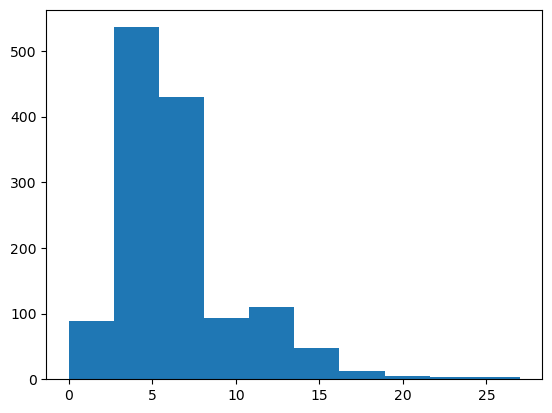

In [19]:
def drawhist(df,feature):
    plt.hist(df[feature])
drawhist(df,'pdays')
plt.show()

plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

In [20]:
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1


In [21]:
col = ['duration', 'pdays']
df.drop(col, axis=1,inplace=True)

In [22]:
object_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,7,1,3,0,1,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,7,1,3,0,0,1,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
6,59,0,1,5,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0


In [23]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays_missing', 'pdays_less_5',
       'pdays_greater_15', 'pdays_bet_5_15'], dtype=object)

In [24]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')
    
def drawhist(df,feature):
    '''Draws an histogram for a feature in a data frame (df)'''
    plt.hist(df[feature])

def functionreplace(df,fea,val1,val2):
    '''Replaces value (val1) with value (val2) in the data frame (df) for a feature (fea)'''
    df[fea].replace(val1,val2)
    return df

def drawbarplot(df,x,y):
    '''Draws a bar plot for a given feature x and y in a data frame'''
    sns.barplot(x=x, y=y, data=df)

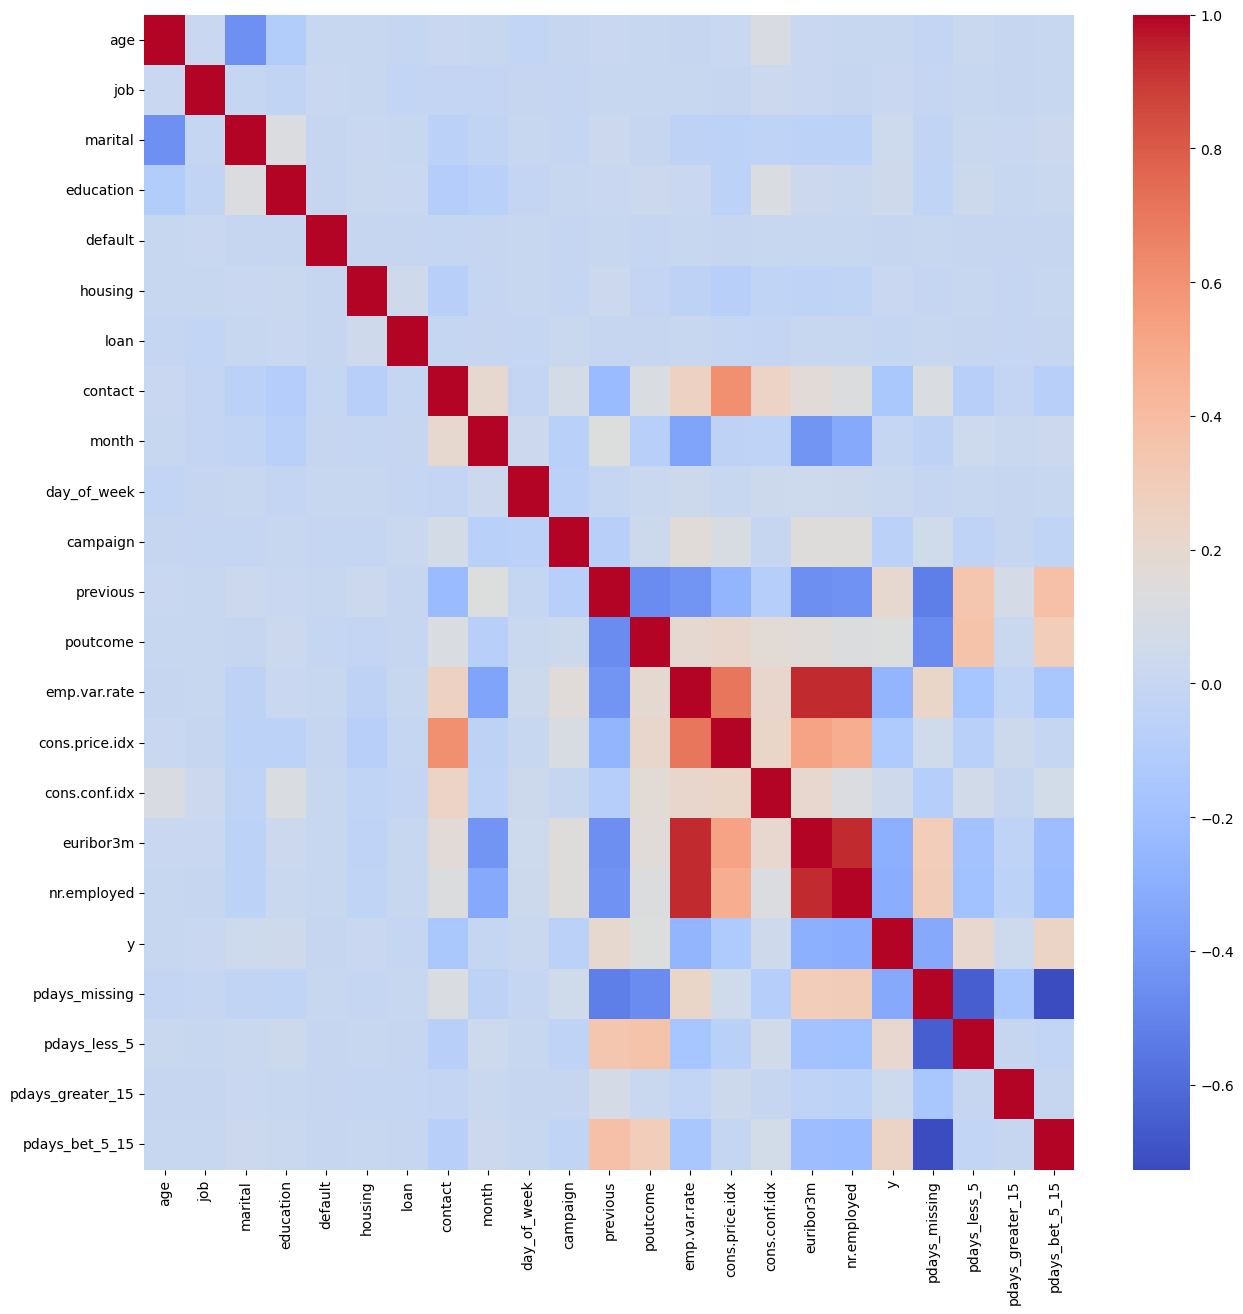

In [25]:
drawheatmap(df)

Berdasarkan heatmap yang dibuat, setiap kolom/category tidak memiliki korelasi satu sama lain. Sehingga tidak memerlukan adanya seleksi kolom.

# Modelling

Mencoba berbagai jenis Model Algoritma untuk menentukan model evaluasi yang terbaik dalam dataframe yang digunakan.

In [26]:
df_dupes = df

In [27]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_dupes,test_size = 0.20 ,random_state = 111)
    
train_X = train.drop(labels='y',axis=1)
train_Y = train['y']
test_X  = test.drop(labels='y',axis=1)
test_Y  = test['y']

In [28]:
from imblearn.over_sampling import SMOTE

os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

## Logistic Regression

 Logistic Regression merupakan teknik analisis data yang menggunakan matematika untuk menemukan hubungan antara dua faktor data.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
df_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
df_lr.fit(train_smote_X, train_smote_Y)

LogisticRegression(random_state=0, solver='liblinear')

In [33]:
print(df_lr.intercept_, df_lr.coef_)

[-0.03707764] [[-1.88077254e-02 -1.16162245e-02 -4.67543268e-01 -2.90220456e-02
  -2.94040526e-01 -7.57742415e-01 -1.12773075e+00 -1.70589931e+00
  -1.10024967e-01 -7.89306269e-02 -1.34576780e-01 -1.57152531e+00
  -8.66636674e-01 -9.83283354e-01  9.88963225e-01  6.09050858e-04
   1.01375121e+00 -1.66841523e-02 -6.27574986e+00 -2.25793837e+00
  -2.89333025e+00 -2.70430982e+00]]


In [34]:
p1 = df_lr.predict(test_X)

In [35]:
confusion_matrix(test_Y, p1)

array([[4420,  917],
       [ 373,  447]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logistic Regression: ",
      accuracy_score(test_Y,p1))

Accuracy for Logistic Regression:  0.7904823777813871


## K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [38]:
df_kn = KNeighborsClassifier(metric='manhattan',n_neighbors=5, weights='distance')

In [39]:
df_kn.fit(train_smote_X, train_smote_Y)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [40]:
p2=df_kn.predict(test_X)

In [41]:
from sklearn.metrics import accuracy_score
print("Accuracy for KNN: ",
      accuracy_score(test_Y,p2))

Accuracy for KNN:  0.7748903686860484


In [42]:
CM2=confusion_matrix(test_Y, p2)
CM2

array([[4336, 1001],
       [ 385,  435]], dtype=int64)

## Support Vector Machine

In [43]:
from sklearn.svm import SVC
from sklearn import svm 
esviem = SVC()

In [44]:
clf = svm.SVC(kernel='linear')

In [45]:
clf.fit(train_smote_X,train_smote_Y)

SVC(kernel='linear')

In [46]:
p3=clf.predict(test_X)

In [47]:
CM3=confusion_matrix(test_Y, p3)
CM3

array([[5000,  337],
       [ 473,  347]], dtype=int64)

In [48]:
print("Accuracy for SVM: ",
      accuracy_score(test_Y,p3))

Accuracy for SVM:  0.8684424232580802


## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

In [50]:
df_dt = DecisionTreeClassifier(criterion='entropy',max_depth=100)
df_dt.fit(train_smote_X,train_smote_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [51]:
p4=df_dt.predict(test_X)

In [52]:
print("Accuracy for Decision Tree: ",
      accuracy_score(test_Y,p4))

Accuracy for Decision Tree:  0.8127334740945266


In [53]:
CM4=confusion_matrix(test_Y, p4)
CM4

array([[4671,  666],
       [ 487,  333]], dtype=int64)

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=123)

In [55]:
df_rf = RandomForestClassifier(criterion='entropy',max_features='sqrt',n_estimators=1000)
df_rf.fit(train_smote_X,train_smote_Y)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [56]:
p5=df_rf.predict(test_X)

In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest: ",accuracy_score(test_Y,p5))

Accuracy for Random Forest:  0.8582101672892642


In [58]:
from sklearn.metrics import confusion_matrix
CM5=confusion_matrix(test_Y, p5)
CM5

array([[4935,  402],
       [ 471,  349]], dtype=int64)

## Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [60]:
gnb.fit(train_smote_X, train_smote_Y)

GaussianNB()

In [61]:
p6 = gnb.predict(test_X)

In [62]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy for Naive Bayes:",metrics.accuracy_score(test_Y, p6))

Accuracy for Naive Bayes: 0.7487412700990742


In [63]:
from sklearn.metrics import confusion_matrix
CM6=confusion_matrix(test_Y, p6)
CM6

array([[4073, 1264],
       [ 283,  537]], dtype=int64)

In [64]:
print("Accuracy for Logistic Regression: ",
      accuracy_score(test_Y,p1))
print("Accuracy for KNN: ",
      accuracy_score(test_Y,p2))
print("Accuracy for SVM: ",
       accuracy_score(test_Y,p3))
print("Accuracy for Decision Tree: ",
      accuracy_score(test_Y,p4))
print("Accuracy for Random Forest: ",
      accuracy_score(test_Y,p5))
print("Accuracy for Naive Bayes:",
      metrics.accuracy_score(test_Y, p6))

Accuracy for Logistic Regression:  0.7904823777813871
Accuracy for KNN:  0.7748903686860484
Accuracy for SVM:  0.8684424232580802
Accuracy for Decision Tree:  0.8127334740945266
Accuracy for Random Forest:  0.8582101672892642
Accuracy for Naive Bayes: 0.7487412700990742


# Conclusion

Dari berbagai model algoritma yang diuji coba pada dataset Bank Additional, hasil accuracy yang paling tinggi ditempati oleh model SVM atau Support Vector Machine. Sehingga untuk mengembangkan Machine Learning untuk dataset ini, saya memilih SVM sebagai algoritma yang digunakan.